# Can we predict individual differences in behavior from brain activity?


Developed at Neurohackweek 2017

## Set up the environment and data

In [1]:
from HCPML_plt import clfAccHist
import os
import platform
import numpy as np
import nibabel as nib
import multiprocessing
import glob

/Users/kevinsitek/miniconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# location of the data on disk
#datapath = os.path.abspath('/Users/kevinsitek/Dropbox (MIT)/projects/nhw17/hcp_data_sample/')
datapath = '/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas'

In [3]:
# select the task and parameter estimate files to run
task = 'WM' # working memory task
pe_list = ['9','10']

Import the data:

In [6]:
sub_list=[] # subject index list
pe_bin_list=[] # list of (binarized) PEs
# add each subject to the data array
for sx, subpath in enumerate(glob.glob(datapath+'/*')):    
    print subpath
    # for each of the two contrasts
    for cx,pe in enumerate(pe_list):
        sub_list.append(os.path.basename(subpath)) # save the subject ID to a subject list
        pe_bin_list.append(cx) # save the (binarized) PE to a PE list
        
        # load the parameter estimates
        fpath = os.path.join(subpath, 'MNINonLinear/Results/tfMRI_%s/'%task,
                             'tfMRI_%s_hp200_s2_level2.feat/GrayordinatesStats/'%task,
                             'cope%s.feat/pe1.dtseries.nii'%(pe))
        pe1 = nib.load(fpath)
        
        # reshape the data into a 2-D array
        sub_pe_data = np.array(pe1.get_data().reshape(pe1.get_data().shape[4:]))
        
        # add the parameter estimate data to the overall data matrix
        if not sx and not cx:
            group_data = sub_pe_data
        else:
            group_data = np.concatenate((group_data, sub_pe_data),axis=0)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/100206
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/100307


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/100408
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/100610


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/101006


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/101107
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/101309


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/101410
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/101915


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/102008
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/102109


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/102311
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/102513


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/102614


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/102715
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/102816


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/103010


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/103212
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/103414


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/103515


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/103818


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/104012


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/104416


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/104820


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/105014


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/105216


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/105620
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/105923


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/106016
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/106319


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/106521


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/106824


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/107220


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/107321
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/107422


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/107725


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/108020
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/108121


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/108222
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/108323


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/108525


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/108828
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/109123


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/109325


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/109830


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/110007
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/110411


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/111009
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/111211


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/111312
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/111413


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/111514
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/111716


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/112112
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/112314


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/112516


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/112819


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/112920
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/113316


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/113417


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/113619
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/113821


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/113922


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/114116


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/114217


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/114318


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/114419


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/114621


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/114823
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/114924


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/115017


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/115219


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/115320


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/115724
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/115825


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/116221
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/116524


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/116726
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/117021


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/117122


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/117324


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/117728
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/117930


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/118023


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/118124


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/118225
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/118528


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/118730
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/118831


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/118932


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/119126


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/119732
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/119833


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/120010


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/120111
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/120212

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1



/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/120414


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/120515
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/120717


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/121315


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/121416


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/121618


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/121719


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/121820


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/121921


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/122317
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/122620


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/122822


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/123117


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/123420


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/123521


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/123723


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/123824


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/123925


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/124220


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/124422


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/124624


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/125222


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/125424
/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/125525

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1



/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/126325


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/126426


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/127226


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/127327


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/127630


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/127832


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/127933


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/128026


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/128127


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/128329


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/128632


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/128935


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/129028


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/129331


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/129634


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/129937


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/130013


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/130114


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/130316


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/130417


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/130518


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/130619


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/130720


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/130821


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/130922


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/131217


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/131419


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/131722


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/131823


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/131924


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/132017


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/132118


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/133019


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/133625


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/133827


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/133928


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/134021


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/134223


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/134324


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/134425


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/134627


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/134728


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/134829


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/135124


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/135225


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/135629


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/135730


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/135932


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/136126


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/136227


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/136631


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/136732


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/136833


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/137027


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/137229


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/137431


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/137532


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/137633


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/138130


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/138231


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/138332


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/138534


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/138837


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/139233


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/139435


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/139637


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/139839


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/140117


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/140319


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/140420


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/140824


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/140925


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/141119


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/141422


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/141826


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/142424


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/142828


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/143224


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/143325


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/143426


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/143830


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/144125


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/144226


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/144428


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/144731


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/144832


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/144933


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/145127


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/145632


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/145834


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/146129


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/146331


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/146432


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/146533


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/146735


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/146836


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/146937


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/147030


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/147636


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/147737


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/148032


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/148133


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/148335


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/148840


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/148941


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/149236


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/149337


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/149539


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/149741


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/149842


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/150019


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/150423


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/150524


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/150726


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/150928


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/151021


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/151223


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/151324


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/151425


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/151526


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/151627


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/151728


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/151829


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/151930


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/152225


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/152427


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/152831


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/153025


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/153126


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/153227


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/153429


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/153631


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/153732


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/153833


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/153934


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/154229


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/154330


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/154431


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/154532


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/154734


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/154936


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/155231


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/155635


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/155938


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/156031


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/156233


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/156334


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/156435


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/156536


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/156637


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/157336


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/157437


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/157942


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/158035


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/158136


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/158338


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/158540


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/158843


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/159138


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/159340


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/159441


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/159845


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/159946


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/160123


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/160729


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/160830


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/160931


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/161327


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/161630


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/161731


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/161832


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/162026


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/162228


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/162329


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/162733


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/162935


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/163331


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/163432


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/163836


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/164030


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/164131


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/164636


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/164939


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/165234


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/165436


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/165638


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/165941


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/166438


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/166640


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/167036


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/167238


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/167440


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/167743


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/168139


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/168240


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/168341


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/168745


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/168947


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/169040


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/169141


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/169343


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/169444


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/169545


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/169747


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/169949


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/170631


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/170934


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/171128


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/171330


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/171431


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/171532


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/171633


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/172029


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/172130


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/172332


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/172433


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/172534


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/172635


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/172938


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/173132


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/173233


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/173334


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/173435


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/173637


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/173738


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/173839


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/173940


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/174437


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/174841


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/175035


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/175136


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/175237


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/175338


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/175439


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/175540


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/175742


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/176037


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/176441


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/176542


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/176744


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/176845


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/177140


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/177241


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/177342


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/177645


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/177746


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/178243


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/178647


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/178748


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/178849


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/179245


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/179346


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/179548


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/179952


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/180129


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/180230


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/180432


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/180533


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/180735


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/180937


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/181131


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/181232


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/181636


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/182032


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/182739


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/182840


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/183034


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/183337


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/183741


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/185038


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/185341


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/185442


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/185947


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/186040


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/186141


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/186444


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/186545


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/186848


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/187345


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/187547


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/187850


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/188145


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/188347


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/188448


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/188549


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/188751


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/189349


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/189450


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/189652


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/190031


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/191033


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/191235


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/191437


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/191841


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/191942


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/192035


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/192136


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/192237


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/192439


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/192641


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/192843


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/193239


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/193441


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/193845


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/194140


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/194443


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/194645


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/194746


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/194847


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/195041


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/195445


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/195647


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/195849


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/195950


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/196144


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/196346


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/196750


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/196851


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/197348


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/197550


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/198047


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/198249


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/198350


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/198451


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/198653


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/198855


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/199150


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/199251


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/199352


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/199453


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/199655


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/199958


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/200008


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/200109


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/200210


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/200311


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/200513


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/200614


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/201111


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/201414


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/201515


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/201717


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/201818


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/202113


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/202719


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/203418


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/203923


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/204016


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/204319


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/204420


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/204521


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/204622


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/205119


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/205220


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/205725


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/205826


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/206222


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/206323


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/206525


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/206727


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/206828


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/206929


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/207123


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/207426


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/208024


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/208125


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/208226


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/208327


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/209127


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/209228


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/209329


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/209531


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/209834


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/209935


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/210011


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/210112


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/210415


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/210617


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/211114


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/211215


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/211316


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/211417


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/211619


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/211720


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/211821


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/211922


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/212015


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/212217


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/212318


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/212419


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/212823


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/213017


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/213421


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/213522


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/214019


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/214423


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/214524


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/214625


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/214726


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/217126


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/217429


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/219231


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/220721


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/221218


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/221319


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/223929


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/224022


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/227432


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/227533


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/228434


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/231928


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/233326


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/236130


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/237334


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/238033


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/239136


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/239944


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/245333


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/246133


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/248238


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/248339


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/249947


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/250427


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/250932


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/251833


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/255639


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/255740


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/256540


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/257542


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/257845


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/257946


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/263436


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/268749


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/268850


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/270332


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/274542


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/275645


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/280739


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/280941


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/281135


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/283543


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/284646


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/285345


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/285446


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/286347


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/286650


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/287248


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/289555


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/290136


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/293748


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/295146


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/297655


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/298051


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/298455


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/299154


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/299760


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/300618


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/300719


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/303119


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/303624


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/304020


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/304727


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/305830


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/307127


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/308129


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/308331


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/309636


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/310621


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/311320


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/314225


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/316633


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/316835


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/317332


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/318637


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/320826


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/321323


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/322224


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/325129


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/329844


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/330324


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/334635


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/336841


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/339847


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/341834


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/342129


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/346137


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/346945


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/348545


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/349244


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/350330


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/351938


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/352132


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/352738


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/353740


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/355239


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/356948


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/358144


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/360030


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/361234


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/361941


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/362034


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/365343


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/366042


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/366446


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/368551


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/368753


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/371843


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/376247


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/377451


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/378756


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/378857


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/379657


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/380036


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/381038


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/381543


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/382242


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/385046


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/385450


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/386250


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/387959


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/389357


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/390645


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/391748


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/392750


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/393247


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/393550


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/394956


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/395251


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/395756


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/395958


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/397154


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/397760


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/397861


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/401422


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/406432


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/406836


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/412528


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/413934


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/414229


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/415837


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/419239


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/421226


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/422632


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/424939


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/429040


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/433839


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/436239


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/436845


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/441939


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/445543


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/448347


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/449753


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/453441


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/453542


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/454140


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/456346


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/459453


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/462139


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/463040


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/465852


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/468050


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/473952


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/475855


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/479762


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/480141


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/481042


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/481951


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/485757


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/486759


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/492754


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/495255


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/497865


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/499566


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/500222


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/506234


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/510225


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/510326


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/512835


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/513130


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/513736


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/516742


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/518746


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/519647


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/519950


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/520228


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/521331


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/522434


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/523032


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/524135


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/525541


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/529549


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/529953


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/530635


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/531536


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/536647


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/540436


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/541640


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/545345


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/548250


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/549757


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/550439


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/552241


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/552544


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/553344


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/555348


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/555651


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/555954


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/557857


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/558657


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/558960


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/559053


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/559457


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/561242


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/561444


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/561949


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/562345


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/562446


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/565452


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/566454


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/567052


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/567759


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/567961


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/568963


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/569965


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/570243


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/571144


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/572045


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/573249


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/573451


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/576255


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/578057


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/578158


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/579665


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/579867


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/580044


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/580347


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/580650


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/580751


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/581349


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/581450


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/583858


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/585256


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/585862


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/586460


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/587664


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/588565


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/589567


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/590047


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/592455


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/594156


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/597869


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/598568


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/599065


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/599469


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/599671


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/601127


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/604537


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/609143


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/611938


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/613235


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/613538


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/614439


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/615441


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/615744


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/616645


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/617748


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/618952


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/620434


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/622236


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/623137


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/623844


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/626648


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/627549


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/627852


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/628248


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/633847


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/634748


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/635245


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/638049


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/644044


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/644246


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/645450


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/645551


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/647858


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/650746


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/654350


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/654552


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/654754


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/656253


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/656657


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/657659


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/660951


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/662551


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/663755


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/664757


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/665254


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/667056


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/668361


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/671855


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/672756


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/673455


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/675661


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/677766


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/677968


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/679568


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/679770


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/680250


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/680452


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/680957


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/685058


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/686969


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/687163


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/688569


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/689470


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/690152


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/692964


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/693461


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/693764


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/694362


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/695768


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/698168


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/700634


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/701535


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/702133


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/704238


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/705341


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/707749


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/709551


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/713239


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/715041


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/715950


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/720337


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/723141


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/724446


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/725751


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/727553


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/728454


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/729254


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/729557


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/731140


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/732243


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/734045


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/734247


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/737960


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/742549


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/744553


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/748258


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/748662


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/749058


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/749361


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/751348


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/751550


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/753150


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/753251


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/756055


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/757764


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/759869


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/760551


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/761957


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/763557


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/765056


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/765864


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/766563


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/769064


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/770352


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/771354


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/773257


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/774663


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/779370


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/782561


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/783462


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/786569


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/788674


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/788876


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/789373


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/792564


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/792766


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/792867


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/793465


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/800941


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/802844


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/803240


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/804646


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/809252


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/810843


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/812746


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/814548


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/814649


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/815247


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/816653


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/818455


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/818859


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/820745


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/822244


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/825048


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/825553


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/825654


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/826353


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/826454


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/827052


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/828862


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/832651


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/833148


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/833249


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/835657


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/837560


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/837964


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/841349


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/843151


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/844961


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/845458


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/849264


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/849971


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/852455


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/856766


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/856968


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/857263


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/859671


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/861456


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/865363


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/867468


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/869472


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/870861


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/871762


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/872158


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/872562


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/872764


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/873968


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/877168


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/877269


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/878776


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/878877


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/880157


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/882161


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/884064


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/885975


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/886674


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/887373


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/888678


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/889579


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/891667


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/894067


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/894673


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/896879


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/898176


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/899885


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/901038


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/901139


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/901442


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/902242


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/904044


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/905147


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/907656


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/908860


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/910241


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/910443


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/911849


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/912447


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/917255


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/917558


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/919966


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/922854


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/923755


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/926862


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/927359


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/929464


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/930449


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/933253


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/937160


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/942658


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/943862


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/947668


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/951457


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/952863


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/953764


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/955465


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/957974


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/958976


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/959574


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/965367


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/965771


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/966975


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/969476


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/970764


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/971160


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/972566


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/973770


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/978578


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/979984


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/983773


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/984472


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/987074


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/987983


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/989987


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/990366


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/991267


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/992673


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/992774


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/994273


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/995174


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


/Volumes/maloneHD/Data_noSync/HCP_ML/WM/betas/996782


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [15]:
# save to a text file for future reading
np.savetxt('task-%s_contrast-data.txt'%task, group_data)

Check the data:

In [ ]:
print 'x shape: ', group_data.T.shape
print 'y shape: ', len(pe_bin_list)

## Run the classifier

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#### Set aside a master holdout test set

In [16]:
# split the data for a master holdout test data set
def split_data(x, y, sub_list, train_fraction):
    import numpy as np
    n_subs = len(y)/2
    rand_subs = np.random.choice(range(n_subs),n_subs,replace=False)
    
    rand_indices = []
    for i, r in enumerate(rand_subs):
        rand_indices.append(r*2)
        rand_indices.append(r*2+1)  
    Xtrain = x[:int(len(y)*train_fraction),:]
    Ytrain = y[:int(len(y)*train_fraction)]
    Xtest = x[int(len(y)*train_fraction):,:]
    Ytest = y[int(len(y)*train_fraction):]
    train_subjects = sub_list[:int(n_subs*train_fraction)]
    test_subjects = sub_list[int(n_subs*train_fraction):]    
    return Xtrain, Xtest, Ytrain, Ytest, rand_indices, train_subjects, test_subjects

fraction = 0.7
Xtrain, Xtest, Ytrain, Ytest, rand_indices, train_subjects, test_subjects = split_data(group_data, pe_bin_list, sub_list, fraction)

In [19]:
Xtrain.shape

(1429, 91282)

#### Run a cross-validated classifier on the training data

In [57]:
# define the number of folds for cross-validation
k_folds = 7

n_subs = len(Ytrain)/2
k_size = n_subs/k_folds

predicted_values = np.zeros(len(Ytrain))
model_accuracies = np.zeros(k_folds)

if n_subs%k_folds:
    # hacky way to keep the # of subjects per fold the same across folds
    raise ValueError('subject number not divisible by number of folds')
else:
    # run the classifier for each cross-validated test set
    for k in range(k_folds):        
        k_pe_indices = []
        
        # split the kth-fold of subjects into the CV test set
        k_sub_range = range(k*k_size,(k+1)*k_size)
        
        # set indices for both PEs per test subject
        for kr in k_sub_range:
            k_pe_indices.append(2*kr)
            k_pe_indices.append(2*kr+1)

        # assign data to the cross-validated test set
        print "test indices = ", k_pe_indices
        cv_Xtest = Xtrain[k_pe_indices,:]
        cv_Ytest = [Ytrain[i] for i in k_pe_indices]

        # assign data to the cross-validation training set
        train_pe_indices = np.delete(range(len(Ytrain)), k_pe_indices)
        print "train indices = ", train_pe_indices
        cv_Xtrain = Xtrain[train_pe_indices]
        cv_Ytrain = [Ytrain[i] for i in train_pe_indices]

        #import the model
        svc = SVC(kernel='linear')

        # fit the model on the training data
        svc.fit(cv_Xtrain, cv_Ytrain)

        # predict the labels of the test data
        prediction = svc.predict(cv_Xtest)
        print "predicted values: ", prediction
        
        # store predicted values to a cross-validated prediction array
        predicted_values[k_pe_indices] = prediction
        
        # check the accuracy of the model's predictions
        model_accuracies[k] = svc.score(cv_Xtest, cv_Ytest)
        print "model accuracy: ", model_accuracies[k]
        print ""

kr =  0
kr =  1
kr =  2
kr =  3
kr =  4
kr =  5
kr =  6
kr =  7
kr =  8
kr =  9
kr =  10
kr =  11
kr =  12
kr =  13
kr =  14
kr =  15
kr =  16
kr =  17
kr =  18
kr =  19
kr =  20
kr =  21
kr =  22
kr =  23
kr =  24
kr =  25
kr =  26
kr =  27
kr =  28
kr =  29
kr =  30
kr =  31
kr =  32
kr =  33
kr =  34
kr =  35
kr =  36
kr =  37
kr =  38
kr =  39
kr =  40
kr =  41
kr =  42
kr =  43
kr =  44
kr =  45
kr =  46
kr =  47
kr =  48
kr =  49
kr =  50
kr =  51
kr =  52
kr =  53
kr =  54
kr =  55
kr =  56
kr =  57
kr =  58
kr =  59
kr =  60
kr =  61
kr =  62
kr =  63
kr =  64
kr =  65
kr =  66
kr =  67
kr =  68
kr =  69
kr =  70
kr =  71
kr =  72
kr =  73
kr =  74
kr =  75
kr =  76
kr =  77
kr =  78
kr =  79
kr =  80
kr =  81
kr =  82
kr =  83
kr =  84
kr =  85
kr =  86
kr =  87
kr =  88
kr =  89
kr =  90
kr =  91
kr =  92
kr =  93
kr =  94
kr =  95
kr =  96
kr =  97
kr =  98
kr =  99
kr =  100
kr =  101
test indices =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,

predicted values:  [0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0
 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0
 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
model accuracy:  0.901960784314

kr =  408
kr =  409
kr =  410
kr =  411
kr =  412
kr =  413
kr =  414
kr =  415
kr =  416
kr =  417
kr =  418
kr =  419
kr =  420
kr =  421
kr =  422
kr =  423
kr =  424
kr =  425
kr =  426
kr =  427
kr =  428
kr =  429
kr =  430
kr =  431
kr =  432
kr =  433
kr =  434
kr =  435
kr =  436
kr =  437
kr =  438
kr =  439
kr =  440
kr =  441
kr =  442
kr =  443
kr =  444
kr =  445
kr =  446
kr =  447
kr =  448
kr =  449
kr =  450
kr =  451
kr =  452
kr =  453
kr =  454
kr =  455
kr =  456
kr =  457
kr =  458
kr =  459
kr =  460
kr 

model accuracy:  0.906862745098



In [65]:
%matplotlib inline

In [74]:
model_accuracies

array([ 0.92156863,  0.91176471,  0.90196078,  0.90196078,  0.96568627,
        0.92156863,  0.90686275])

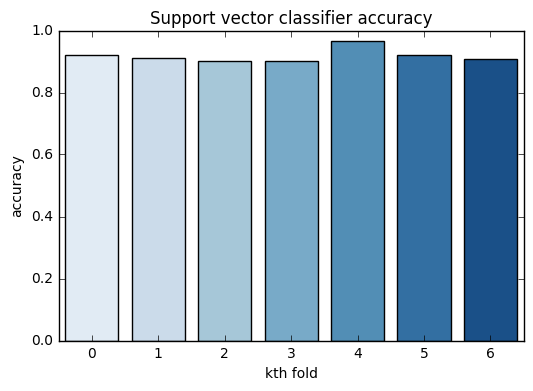

In [97]:
ax = sns.barplot(range(7),model_accuracies, palette='Blues')
ax.set(xlabel = 'kth fold', ylabel = 'accuracy', 
       title = "Support vector classifier accuracy",)

#### Create a classification model based on all the training data

In [ ]:
# import the model
svc = SVC(kernel='linear')

# fit the model on the training data
svc.fit(Xtrain, Ytrain)

# Dot Product , Behaviour Data --> Predictive Error

## Load the Beta Signature from Model

In [ ]:
beta_signature = svc.coef_
subs_test = test_subjects
subs_test = np.asarray(list(set(subs_test)))

## Load behavioral data

In [ ]:
import pandas as pd
csvFile = pd.read_csv('HCP_behavioraldata.csv')


### Functions

In [ ]:
def getBehaviourData(subs_test, df):
    subs  = [int(s) for s in subs_test] #convert str to int
    allSubjectsIndex = df['Subject']
    df2   = df.loc[df['Subject'].isin(subs)]
    bdata = df2['ListSort_AgeAdj']

    behaviourData = np.asarray(bdata)
    behaviourData = np.reshape(behaviourData, [behaviourData.shape[0], 1])
    return behaviourData

In [ ]:
def dotProduct(subs_test):
    dotProduct = np.zeros([len(subs_test),1])
    subs_test = set(subs_test)

    for index, s in enumerate(subs_test):
        path = os.path.join(datapath, s,
                                     'MNINonLinear', 'Results', 'tfMRI_'+task,
                                     'tfMRI_'+task+'_hp200_s2_level2.feat',
                                     'GrayordinatesStats','cope10.feat','pe1.dtseries.nii')
        beta_map  = nib.load(path)
        beta_map  = np.array(beta_map.dataobj)
        beta_map  = beta_map[0, 0, 0, 0, :, 0:]
        dotProduct[index] = np.dot(beta_signature,beta_map.transpose())
    return dotProduct

## Running Everything

In [54]:
totalTestSamples = subs_test.shape[0]

perm = np.arange(totalTestSamples)
np.random.shuffle(perm)
subs_test = subs_test[perm]

#N = [50, 100, 150]
ns = range(50,301,10)
PE = []
for n in ns:
    start = 0

    perm = np.arange(totalTestSamples)
    np.random.shuffle(perm)
    subs_test = subs_test[perm]

    currentTestSubjects = subs_test[start : start + n]
    
    dp = dotProduct(currentTestSubjects)
    beh = getBehaviourData(currentTestSubjects, csvFile)
    predictiveError =  np.sum((dp - beh) ** 2) / n
    print("predictiveError: ", predictiveError, "N: ", n)
    PE.append(predictiveError)    
    start = start + n

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

('predictiveError: ', 10611.338066071272, 'N: ', 50)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

('predictiveError: ', 11250.630084189523, 'N: ', 60)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

('predictiveError: ', 10835.804923333726, 'N: ', 70)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

('predictiveError: ', 10727.519221757229, 'N: ', 80)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

('predictiveError: ', 10932.036849455344, 'N: ', 90)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

('predictiveError: ', 10635.250775252192, 'N: ', 100)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

('predictiveError: ', 10837.13675167574, 'N: ', 110)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

('predictiveError: ', 10966.352917569604, 'N: ', 120)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

('predictiveError: ', 10630.012741815177, 'N: ', 130)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

('predictiveError: ', 10867.230215556259, 'N: ', 140)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


('predictiveError: ', 10617.661287214623, 'N: ', 150)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


('predictiveError: ', 10479.157027820534, 'N: ', 160)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


('predictiveError: ', 11076.087416703616, 'N: ', 170)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

('predictiveError: ', 10862.234311818429, 'N: ', 180)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

('predictiveError: ', 10881.253054810521, 'N: ', 190)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

('predictiveError: ', 10909.328490882648, 'N: ', 200)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

('predictiveError: ', 10661.549463006908, 'N: ', 210)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

('predictiveError: ', 10719.705822744187, 'N: ', 220)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

('predictiveError: ', 10722.597476523515, 'N: ', 230)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

('predictiveError: ', 10730.800516270951, 'N: ', 240)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

('predictiveError: ', 10628.098911186851, 'N: ', 250)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

('predictiveError: ', 10815.194873728182, 'N: ', 260)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

('predictiveError: ', 10736.991973405804, 'N: ', 270)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

('predictiveError: ', 10878.64122078035, 'N: ', 280)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

('predictiveError: ', 11089.490693589716, 'N: ', 290)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

('predictiveError: ', 10995.441964740023, 'N: ', 300)


## Plot the Predictive Error

In [55]:
pe_sqrt = np.sqrt(PE)

In [42]:
import seaborn as sns

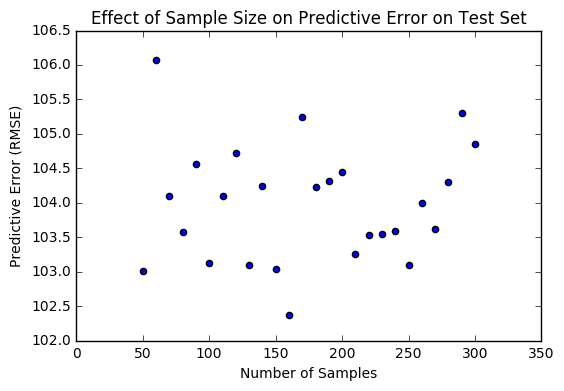

In [56]:
import matplotlib.pyplot as plt
ax = plt.scatter(ns, pe_sqrt)
plt.xlabel("Number of Samples")
plt.ylabel("Predictive Error (RMSE)")
plt.title("Effect of Sample Size on Predictive Error on Test Set")
plt.show()

In [40]:
pe_sqrt

array([ 105.25736751,  104.29821698,  105.22072975,  105.60240312,
        105.49427081,  105.43326126,  105.78280324,  105.66642368,
        105.28869557,  105.57047902,  105.57487458,  105.68953916,
        105.57592928,  105.51510879,  105.36792132,  105.20579762,
        105.1162258 ,  105.30418349,  105.30771816,  105.08206119,
        104.91048274,  104.55036253,  104.36971562,  104.28393242,
        104.28800641,  104.28407358])